### PROJEK ANALISIS SENTIMEN APLIKASI SHOPEE DI GOOGLE PLAY STORE

Nama anggota kelompok:
1. Andi Agustinus
2. Bayu Eka Salam
3. Rio Sanjaya
4. Zuhri

### 1. Proses Crawling data


In [ ]:
#Modul google-play-scraper digunakan untuk mengambil data aplikasi dari Google Play store

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Melakukan import library

from google_play_scraper import app
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Kikis jumlah ulasan yang diinginkan

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id', #Jenis bahasa yang ingin digunakan
    country='id', #Pemilihan Negara
    sort=Sort.MOST_RELEVANT, #default ke Sortir. PALING RELEVAN Anda dapat menggunakan Sort. TERBARU untuk mendapatkan ulasan terbaru
    count=1000, #jumlah data yg di ambil 1000
    filter_score_with=None #default ke Tidak Ada (berarti semua skor) Gunakan 1 atau 2 atau 3 atau 4 atau 5 untuk memilih skor tertentu
)

In [ ]:
df_data = pd.DataFrame(np.array(result),columns=['review'])

df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))

df_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFW32C9zXPdEQAvMImnpdgN9UPPVASiLQXzIMD...,Fauzi,https://play-lh.googleusercontent.com/a-/AOh14...,untuk pelayanan semua oke lah yah.. cuman rasa...,2,261,2.87.40,2022-05-31 12:30:56,"Hi kak Fauzi, mohon maaf atas ketidaknyamanann...",2022-05-31 14:27:53
1,gp:AOqpTOHpzpgrd26L9odRtaJNrMkllh6sqKbMiQgbQUC...,Marzuki Habeahan,https://play-lh.googleusercontent.com/a-/AOh14...,Aplikasinya lemot buat narik darah . Pengirima...,1,9822,2.85.32,2022-05-11 07:06:42,"Hi kak Marzuki, maaf ya atas kendalanya. Mimin...",2022-05-11 08:20:11
2,gp:AOqpTOHZw3S6LY7tI150y3G41qLyPScjhbveWtGzZOk...,Achmadul Haddy,https://play-lh.googleusercontent.com/a/AATXAJ...,Kecewa dengan pembaruan shopee yang sekarang k...,4,5285,2.86.08,2022-05-09 04:12:15,"Hi Kak, Shopee update sistem opsi pengiriman s...",2021-03-23 04:59:10
3,gp:AOqpTOGg_lfYu2l-Xt5Cj5jMG0Bm1zEEPe1twuHRNnJ...,Diego LindzZ,https://play-lh.googleusercontent.com/a-/AOh14...,"Sering crash, jaringan lancar jaya tp gambar t...",1,11,2.85.32,2022-05-31 03:18:53,"Hi kak Diego, mohon maaf yaa terkait kendala p...",2022-05-31 04:51:51
4,gp:AOqpTOGNYEtPx1KmA1gwrgCkH8M4XNRjvX3fsmLsvam...,Farah Aisyah,https://play-lh.googleusercontent.com/a-/AOh14...,Aih! Kenapa aplikasinya restart Mulu sih min s...,1,2002,2.86.08,2022-05-06 07:44:09,Hi kak maaf yaa udah buat resah. Boleh yuk kak...,2022-05-06 09:16:31


In [ ]:
#Hitung jumlah data yang kita dapatkan

len(df_data.index)

1000

In [ ]:
#Pratinjau nama pengguna, peringkat, tanggal-waktu, dan ulasan saja

df_data[['at','score', 'content']].head()  

,at,score,content
0,2022-05-31 12:30:56,2,untuk pelayanan semua oke lah yah.. cuman rasa...
1,2022-05-11 07:06:42,1,Aplikasinya lemot buat narik darah . Pengirima...
2,2022-05-09 04:12:15,4,Kecewa dengan pembaruan shopee yang sekarang k...
3,2022-05-31 03:18:53,1,"Sering crash, jaringan lancar jaya tp gambar t..."
4,2022-05-06 07:44:09,1,Aih! Kenapa aplikasinya restart Mulu sih min s...


In [ ]:
#Jalankan Kode Ini untuk Mengurutkan Data Berdasarkan Tanggal

new_df = df_data[['at','score', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,at,score,content
992,2022-05-31 13:11:28,1,Sngat2 kecewa x sama sistem jualan di shopee. ...
0,2022-05-31 12:30:56,2,untuk pelayanan semua oke lah yah.. cuman rasa...
702,2022-05-31 12:13:04,5,Awal nya saya sangat puas berbelanja di shopee...
315,2022-05-31 12:02:19,2,"Bukannya sok tau, tapi ada apa dengan koneksi ..."
885,2022-05-31 12:01:51,2,Tolong dong pihak Shopee lebih di tegasin lagi...


In [ ]:
#Dapatkan hanya Nama_Pengguna, Peringkat, Tanggal, dan Tanggapan

df = sorted_df[['at','score', 'content']] 

In [ ]:
df.head()

,at,score,content
992,2022-05-31 13:11:28,1,Sngat2 kecewa x sama sistem jualan di shopee. ...
0,2022-05-31 12:30:56,2,untuk pelayanan semua oke lah yah.. cuman rasa...
702,2022-05-31 12:13:04,5,Awal nya saya sangat puas berbelanja di shopee...
315,2022-05-31 12:02:19,2,"Bukannya sok tau, tapi ada apa dengan koneksi ..."
885,2022-05-31 12:01:51,2,Tolong dong pihak Shopee lebih di tegasin lagi...


In [ ]:
def pelabelan(score):
  if score < 4:
    return 'NEGATIF'
  else:
    return 'POSITIF'
  
df['label'] = df['score'].apply(pelabelan)
df.head(5)

,at,score,content,label
992,2022-05-31 13:11:28,1,Sngat2 kecewa x sama sistem jualan di shopee. ...,NEGATIF
0,2022-05-31 12:30:56,2,untuk pelayanan semua oke lah yah.. cuman rasa...,NEGATIF
702,2022-05-31 12:13:04,5,Awal nya saya sangat puas berbelanja di shopee...,POSITIF
315,2022-05-31 12:02:19,2,"Bukannya sok tau, tapi ada apa dengan koneksi ...",NEGATIF
885,2022-05-31 12:01:51,2,Tolong dong pihak Shopee lebih di tegasin lagi...,NEGATIF


In [ ]:
#menampilkan data label
y = df['score']
y[0:5]


992    1
0      2
702    5
315    2
885    2
Name: score, dtype: int64

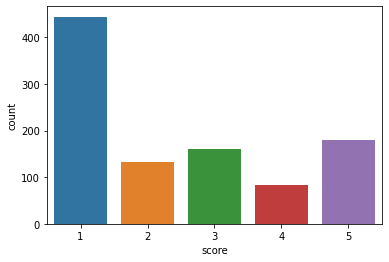

In [ ]:
#menampilkan grafik nilai dari variabel "label"
sns.countplot(x="score", data=df)

In [ ]:
#menghitung jumlah data masing-masing label
df["score"].value_counts()

1    444
5    179
3    160
2    133
4     84
Name: score, dtype: int64

### 2. Proses Preprocessing 

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import re
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from os import remove
def pre_process(text):
  text = text.lower() # Merubah format text menjadi format huruf kecil (lowercase)
  text = re.sub(r"\d+", "", text) # menghapus karakter angka
  text = text.translate(str.maketrans("","",string.punctuation))# menghapus karakter tanda baca
  TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" # menghapus karakter url dan simbol
  text = text.strip() # menghapus karakter kosong
  pisah = text.split() # memisahkan string kedalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya
  tokens = nltk.tokenize.word_tokenize(text) # menggunakan library NLTK untuk memisahkan kata dalam sebuah kalimat
  removed = []
  for t in tokens:
      removed.append(t)
  return text

df['content'] = df['content'].apply(lambda x:pre_process(x))
df.head(20)

,at,score,content,label
992,2022-05-31 13:11:28,1,sngat kecewa x sama sistem jualan di shopee ak...,NEGATIF
0,2022-05-31 12:30:56,2,untuk pelayanan semua oke lah yah cuman rasany...,NEGATIF
702,2022-05-31 12:13:04,5,awal nya saya sangat puas berbelanja di shopee...,POSITIF
315,2022-05-31 12:02:19,2,bukannya sok tau tapi ada apa dengan koneksi s...,NEGATIF
885,2022-05-31 12:01:51,2,tolong dong pihak shopee lebih di tegasin lagi...,NEGATIF
267,2022-05-31 11:54:46,5,mantap sangat membantu belanja apapun jadi rin...,POSITIF
319,2022-05-31 11:22:49,4,suka belanja di shopee alhamdulillah sejauh i...,POSITIF
437,2022-05-31 11:19:13,1,kecewa dengan shoppe s paylater dan s pinjam t...,NEGATIF
62,2022-05-31 10:30:34,4,aku agak kesel sihsoalnya pas buka aplikasinya...,POSITIF
768,2022-05-31 09:15:09,2,sya pengguna jakone mobile semenjak cimb niaga...,NEGATIF


In [ ]:
from matplotlib import pyplot as plt

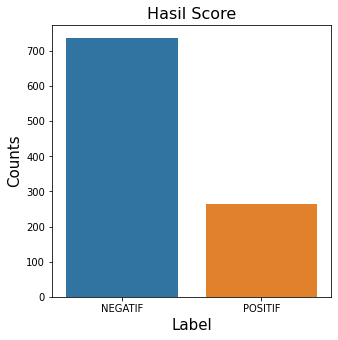

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=df)
plt.title('Hasil Score', fontsize=16)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Label', fontsize=15)
plt.xticks(rotation='horizontal');

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud 

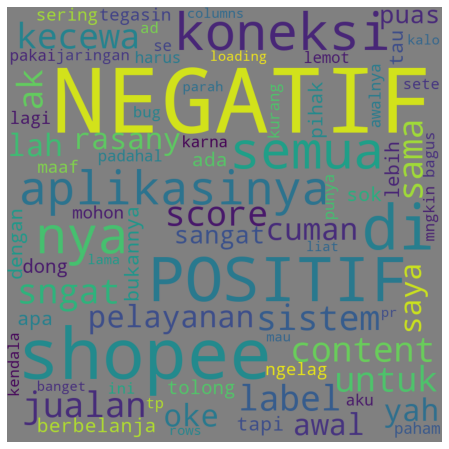

In [ ]:
# kata yang sering muncul positif dan negatif
wordcloud = WordCloud(width = 800, height= 800, background_color = 'gray', max_words = 1000, min_font_size = 20).generate(str(df))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Simpan file sebagai CSV
df.to_csv("Hasil_Crawling.csv", index = False) 

### 3. Proses Modelling

### Logistic Regression

In [ ]:
#melakukan pemodelan prediksi

%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss


#membangun vector space model
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(df.content)

#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)

#modeling sentiment
LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)



CPU times: user 203 ms, sys: 7.2 ms, total: 210 ms
Wall time: 211 ms


### 4. Proses Evaluation

In [ ]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
print('F1 score : ', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print ('Log Loss : ', log_loss(y_test, yhat_prob))

F1 score :  0.39357616836499465
Log Loss :  1.3290154075141134


### * Proses Evaluasi Model

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(df['content'])
x = cv.transform(df['content'])

y = df['label']

In [ ]:
# Build Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(x, y, train_size=0.80)

In [ ]:
# Find the best value of C in logistic regression
for c in [0.01, 0.05, 0.25, 0.5, 1]:

    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print('Accuracy for C-%s: %s' 
          % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C-0.01: 0.755
Accuracy for C-0.05: 0.83
Accuracy for C-0.25: 0.815
Accuracy for C-0.5: 0.825
Accuracy for C-1: 0.805


In [ ]:
final_model_sv = SVC(C=1)
final_model_sv.fit(x, y)
print('Final Model Accuracy: %s' %accuracy_score(y_test, final_model_sv.predict(X_test)))

Final Model Accuracy: 0.955


### 5. Proses Prediction

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) #20% data testing

In [ ]:
import time

In [ ]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [ ]:
predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

SVM Training time: 0.320468s; Prediction time: 67.564074s


In [ ]:
#melakukan training
def training_step(df, vectorizer) :
    features = vectorizer.fit_transform(df.content)
    LR_ = LogisticRegression(C = 3, solver='liblinear', max_iter=150).fit(features,y)
    return LR_

#melakukan testing
classifier = training_step(df, vectorizer)
result = classifier.predict(vectorizer.transform(df.content))

In [ ]:
#simpan hasil
np.savetxt('/content/Hasil_Crawling.txt', result, fmt='%s', delimiter='\n')

In [ ]:
df_hasil = pd.read_csv(r'/content/Hasil_Crawling.txt')
df_hasil.head()

,NEGATIF
0,NEGATIF
1,POSITIF
2,NEGATIF
3,NEGATIF
4,POSITIF


In [ ]:
def prediksi_komentar(comment):
  result = classifier.predict(vectorizer.transform([comment]))
  if result == 1:
    return "negatif"
  else:
    return "positif"

In [ ]:
prediksi_komentar('aplikasi nya sangat lambat')

'positif'